# College Clustering with KMeans

This project uses unsupervised learning to explore patterns in U.S. college data. The goal is to classify institutions as private or public based on features like tuition, enrollment, and graduation rates.

## 🛠 Features

- Data loading and preprocessing from `college_data.csv`
- Exploratory Data Analysis (EDA) using seaborn and matplotlib
- Visualizations: scatter plots, histograms, and FacetGrid
- KMeans clustering on numeric features
- Evaluation against known labels using confusion matrix and classification report

## 📊 Technologies

- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn

## 🚀 Run It Yourself

1. Clone this repo  
2. Install required libraries:  
   ```bash
   pip install pandas numpy matplotlib seaborn scikit-learn
   ```
3. Run the notebook or script in your Python environment

## 📈 Results

KMeans achieved up to 83% accuracy after aligning cluster labels with true institutional types, demonstrating effective unsupervised separation based on college features.


In [1]:
# Import essential libraries for data manipulation and visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the college dataset, using the first column as the index
df = pd.read_csv('college_data.csv', index_col=0)

In [3]:
# Display basic dataset information
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Exploratory Data Analysis

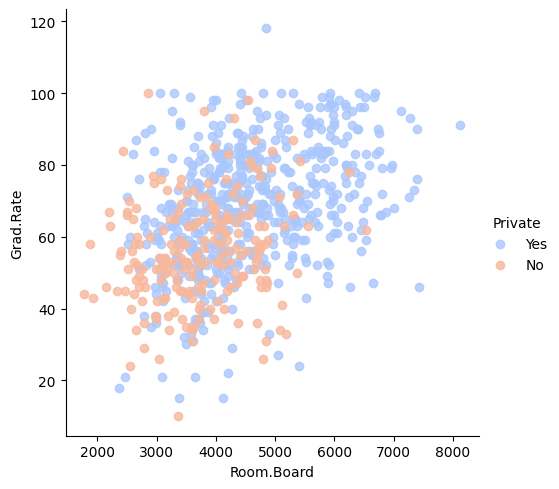

In [6]:
# Scatterplot of Room and Board cost vs Graduation Rate, colored by Private/Public
sns.lmplot(x = 'Room.Board', y = 'Grad.Rate', hue='Private', data=df, fit_reg=False, palette='coolwarm')
plt.show()

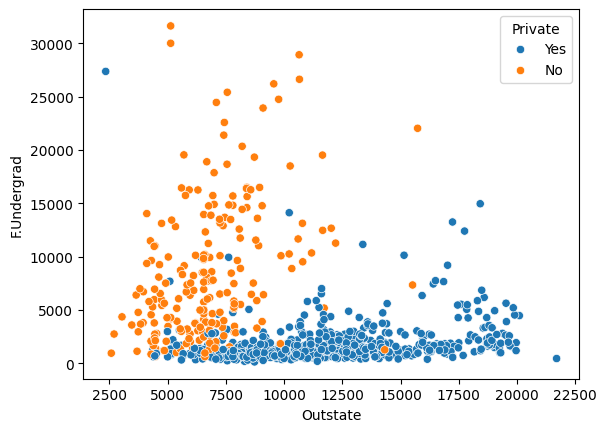

In [7]:
#  Scatterplot of Out-of-State Tuition vs Number of Full-Time Undergrads
sns.scatterplot(x = 'Outstate', y = 'F.Undergrad', data=df, hue='Private')
plt.show()

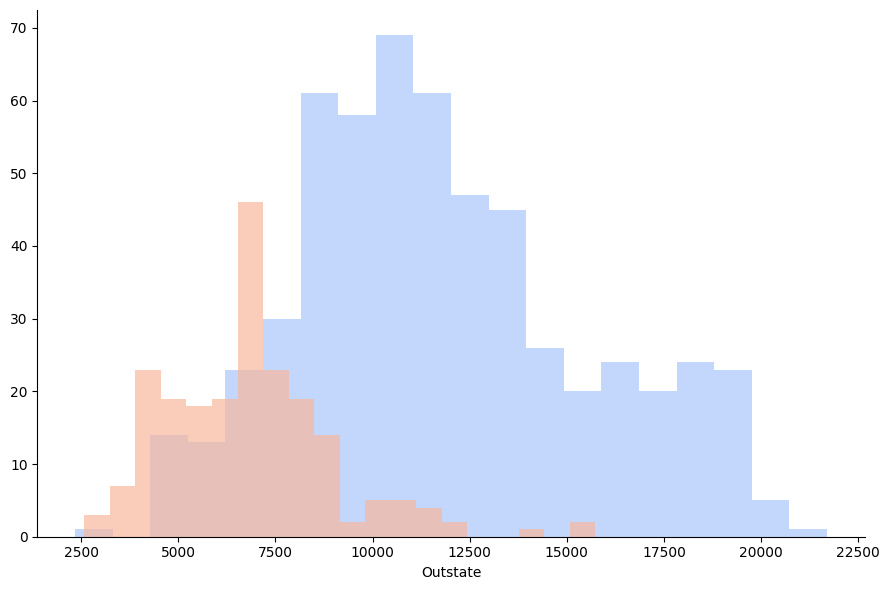

In [8]:
# Histogram of Out-of-State Tuition, split by Private status
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=1.5)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

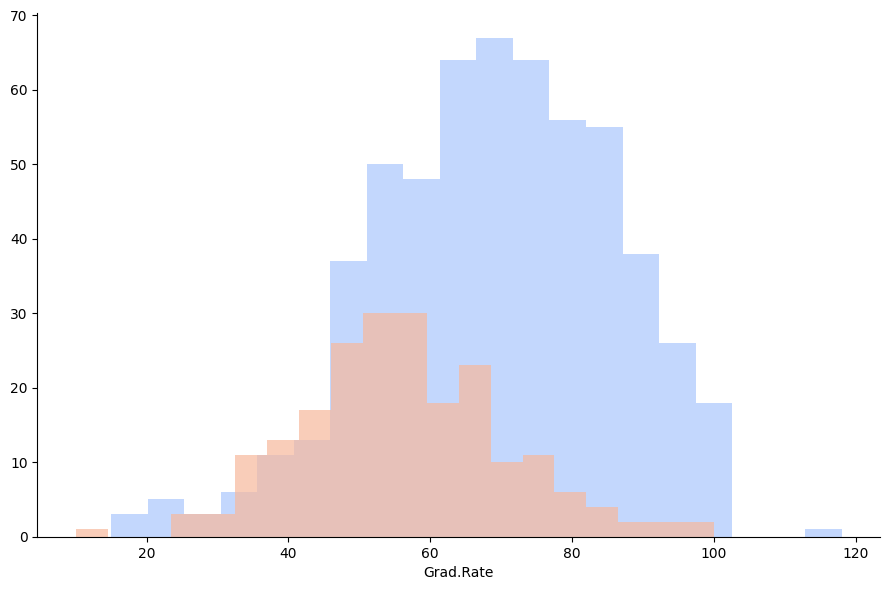

In [9]:
# Histogram of Graduation Rate by Private/Public colleges
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=1.5)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [10]:
# Check for anomalous graduation rates
df[df['Grad.Rate'] > 100]  # Graduation Rate should not exceed 100%

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
# Fixed Graduation Rate 
df.loc['Cazenovia College', 'Grad.Rate'] = 100

In [12]:
# checking record is present or not
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


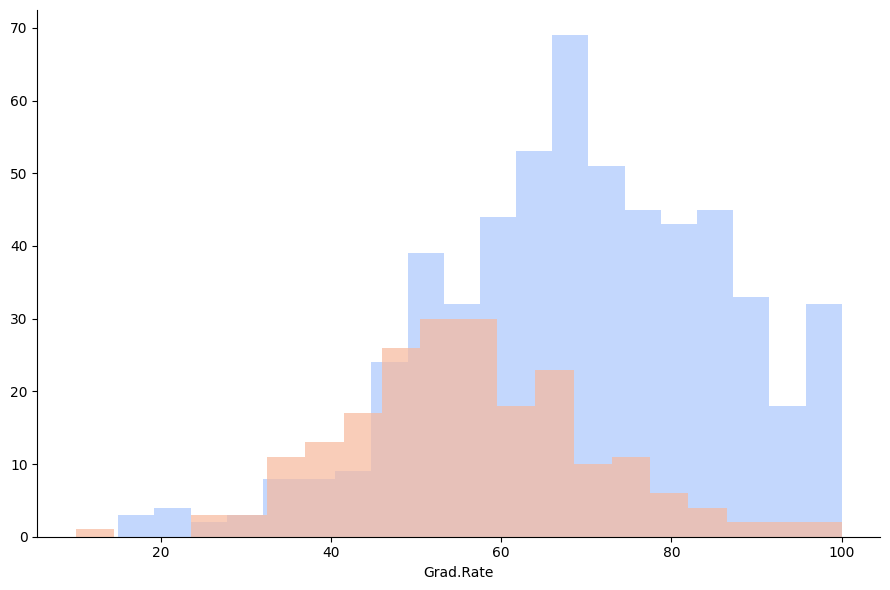

In [13]:
# Visualize fixed Graduation Rate distribution
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=1.5)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

K Means Cluster Creation 

In [14]:
from sklearn.cluster import KMeans

In [15]:
# Initialize KMeans with 2 clusters (Private vs Public)
kmeans = KMeans(n_clusters=2)

In [16]:
# Fit the model on all features except the target 'Private' 
kmeans.fit(df.drop('Private', axis = 1))

KMeans(n_clusters=2)

In [17]:
# Cluster centers (coordinates in feature space)
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

Evaluation 

In [18]:
# Define a function to convert 'Private' column to binary (1 for Yes, 0 for No)
def converter(private):
    if private == 'Yes':
        return 1 
    else:
        return 0

In [19]:
# Create a new column with numeric cluster labels for comparison
df['Cluster'] = df['Private'].apply(converter)

In [20]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [21]:
# Generate confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df['Cluster'], kmeans.labels_))

[[ 74 138]
 [ 34 531]]


In [22]:
# Generate and classification report
print(classification_report(df['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [23]:
# Try inverting the cluster labels
from sklearn.metrics import accuracy_score

inverted_labels = 1 - kmeans.labels_
print("Accuracy (original):", accuracy_score(df['Cluster'], kmeans.labels_))
print("Accuracy (inverted):", accuracy_score(df['Cluster'], inverted_labels))

Accuracy (original): 0.7786357786357786
Accuracy (inverted): 0.22136422136422138


- Your inverted accuracy of ~77% suggests that KMeans clustering is doing a surprisingly good job grouping colleges by whether they are private or public—just not labeling them the same way you are.

- The confusion matrix looks worse when labels are misaligned. When flipped, most private and public colleges fall into the expected cluster.